<h1>LZ77 Algorithm</h1>

<h3>Introduction</h3>

LZ77 is a comprassion algorithm, that encodes with 3 symbols, represents length, offset, and next element.
<0, 0, 'a'> for example

In [4]:
import time
import matplotlib.pyplot as plt

<h2>Code</h2>

This code defines a class LZ77 that implements the LZ77 algorithm, which is a lossless data compression algorithm. The class has three methods:

lz77_compress(self, file=None, data=None) - compresses the input data using the LZ77 algorithm. If a file is given, it reads the data from the file. If the data parameter is given, it uses that data. The output is a compressed list of tuples.

lz77_decompress(self, data, file=None) - decompresses the input data using the LZ77 algorithm. The input data should be the compressed list of tuples returned by the lz77_compress method. If a file is given, it writes the decompressed data to that file. Otherwise, it returns the decompressed data as a string.

The LZ77 algorithm works by identifying repeated patterns in the input data and replacing them with a reference to the previous occurrence of that pattern. The reference is represented as a tuple containing the distance to the previous occurrence in the search buffer, the length of the repeated pattern, and the next symbol in the input data. If no repeated patterns are found, a tuple is created with 0 for distance and length, and the current symbol is included. The search buffer is a sliding window that stores a fixed number of previous symbols to compare against the current input. The buffer size is determined by the buffer_size parameter passed during initialization.

In [25]:
class LZ77:
    """LZ77 algorithm implementation."""

    def __init__(self, buffer_size):
        """Initialize LZ77 algorithm.

        :param buffer_size: size of buffer
        """
        self.buffer_size = buffer_size

    def get_data(self, file):
        """Get data from file.

        :param file: file to read
        :return: data from file
        """

        with open(file, 'r', encoding='utf-8') as f:
            data = f.readlines()
        data = ''.join(data)
        return data


    def lz77_compress(self, file=None, data=None):
        """Compress data using LZ77 algorithm.

        :param data: data to compress
        :param file: file to compress
        :return: data data
        >>> lz77 = LZ77(6)
        >>> lz77.lz77_compress('cabracadabrarrarrad')
        [(0, 0, 'c'), (0, 0, 'a'), (0, 0, 'b'), (0, 0, 'r'),\
    (3, 1, 'c'), (2, 1, 'd'), (7, 4, 'r'), (3, 3, 'r'), (3, 1, 'd')]
        """
        data = self.get_data(file) if data is None else data
        compressed_data = []
        search_buffer = ''
        pos = 0
        while pos < len(data):

            if data[pos] not in search_buffer:
                compressed_data.append((0, 0, data[pos]))
                search_buffer += data[pos]
                pos += 1
            else:
                for i in range(self.buffer_size+1):
                    if data[pos:pos+i+1] in search_buffer:
                        element = data[pos:pos+i+1]
                index = search_buffer.rfind(element)
                next_el = data[pos+len(element)] if pos+len(element) < len(data) else ''
                compressed_data.append((len(search_buffer)-index, len(element), next_el))
                search_buffer += element + next_el
                pos += len(element) + 1
        with open('compressed.txt', 'w', encoding='utf-8') as f:
            f.write(str(compressed_data))
        return compressed_data


    def lz77_decompress(self, data, file=None):
        """Decompress data using LZ77 algorithm.

        :param data: data to decompress
        :param file: file to decompress
        :return: decompressed data
        >>> lz77 = LZ77(6)
        >>> lz77.lz77_decompress([(0, 0, 'c'), (0, 0, 'a'), (0, 0, 'b'), (0, 0, 'r'),\
(3, 1, 'c'), (2, 1, 'd'), (7, 4, 'r'), (3, 3, 'r'), (3, 1, 'd')])
        'cabracadabrarrarrad'
        """
        decompressed_data = ""
        while len(data):
            if data[0][0] == 0 and data[0][1] == 0:
                decompressed_data += data[0][2]
                data.pop(0)
            else:
                index = len(decompressed_data) - int(data[0][0])
                length = int(data[0][1])
                for i in range(length):
                    decompressed_data += decompressed_data[index+i]
                decompressed_data += data[0][2]
                data.pop(0)
        if file:
            with open(file, 'w', encoding='utf-8') as f:
                f.write(decompressed_data)
        return decompressed_data

In [26]:
lz77 = LZ77(6)

encode_decode_speed function will show us speed of this algorithm on large data

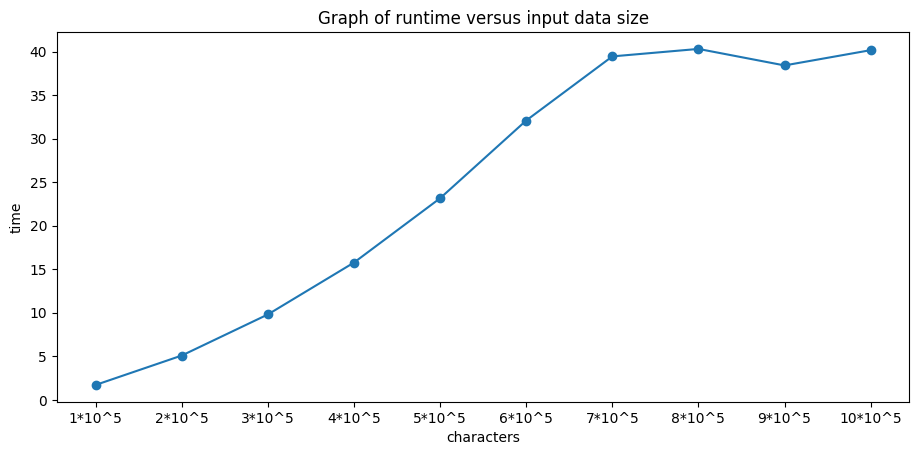

In [8]:
def encode_decode_speed(file, lz77_):
    """Graph of runtime versus input data size.

    :param file: file to compress
    :param lz77_: LZ77 class instance
    """
    with open(file, 'r', encoding='utf-8') as f:
        data = f.readlines()
    data = ''.join(data)
    result = {}
    for i in range(1, 11):
        new_data = data[:100000*i]
        start = time.time()
        comp = lz77_.lz77_compress(data=new_data)
        lz77_.lz77_decompress(comp)
        result[f'{i}*10^5'] = (time.time() - start)
    plt.figure().set_figwidth(11)
    plt.plot(result.keys(), result.values(), marker = 'o')
    plt.title('Graph of runtime versus input data size')
    plt.xlabel('characters')
    plt.ylabel('time')
    plt.show()

encode_decode_speed('data.txt', lz77)

And number_symbols_compress shows the percentage of data compression

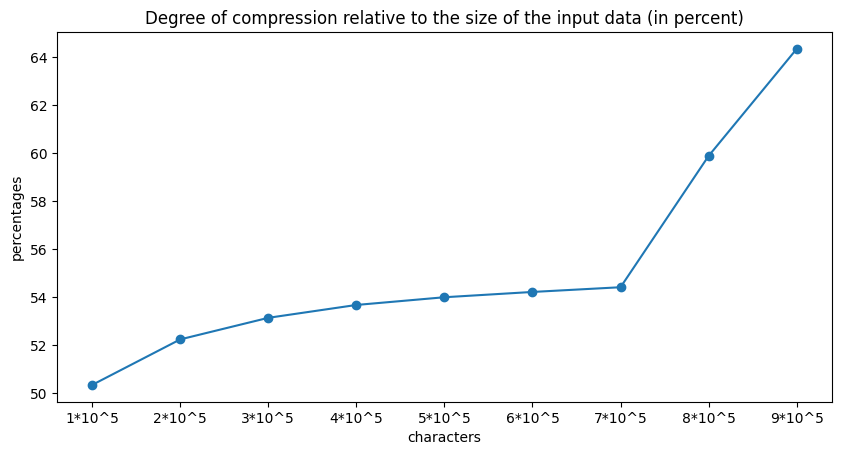

In [35]:
def number_symbols_compress(file, lz77_):
    """Degree of compression relative to the size of the input data (in percent).

    :param file: file to compress
    :param lz77_: LZ77 class instance
    """
    with open(file, 'r', encoding='utf-8') as f:
        data = f.readlines()
    data = ''.join(data)
    result = {}
    for i in range(1, 10):
        new_data = data[:100000*i]
        comp = lz77_.lz77_compress(data=new_data)
        symb = len(comp)*3
        result[f'{i}*10^5'] = (1 - symb/(100000*i))*100
    plt.figure().set_figwidth(10)
    plt.plot(result.keys(), result.values(), marker = 'o')
    plt.title('Degree of compression relative to the size of the input data (in percent)')
    plt.xlabel('characters')
    plt.ylabel('percentages')
    plt.show()

number_symbols_compress('data.txt', lz77)

<h3>Conclusion</h3>

Overall, the LZ77 algorithm is an effective compression algorithm that can significantly reduce the size of data while maintaining its original information. However, the algorithm can be computationally intensive for large input data, as it requires iterating through the entire data set to find repeated patterns. Additionally, the compression ratio achieved by the algorithm can depend heavily on the structure and content of the input data.
So, as we see starting from 700 thousands symbols, the efficiency increases dramatically.
Because of that runtime for 700 thousands an above are approximately equal.
To put it in a nutshell, it's better to use lz77 from 700 thousands characters and not divide data into small pieces.